In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 기본 통계량의 불안정성 예시: 평균과 표준편차

-0.26951611032632805
0.027109073490359778
-0.020616059111720507
-0.038643973513210604


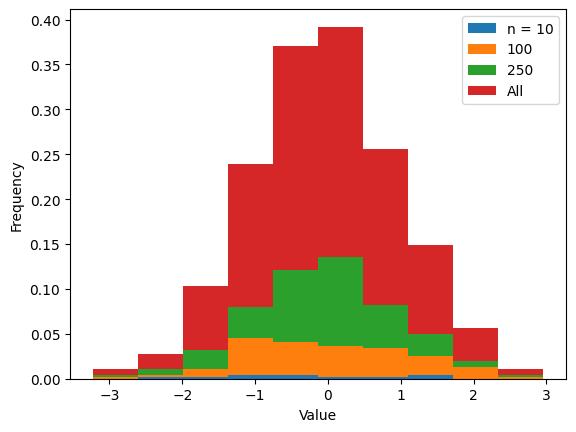

In [ ]:
np.random.seed(123) # 난수 고정

normal = np.random.randn(500)
print(np.mean(normal[:10]))
print(np.mean(normal[:100]))
print(np.mean(normal[:250]))
print(np.mean(normal))

plt.hist([normal[:10],normal[10:100],normal[100:250],normal],density=True,histtype='bar',stacked=True)
plt.legend(['n = 10','100','250','All'])
plt.ylabel('Frequency')
plt.xlabel('Value');

In [15]:
print(np.std(normal[:10]))
print(np.std(normal[:100]))
print(np.std(normal[:250]))
print(np.std(normal))

1.236304801499023
1.128240470477961
1.0174604368340197
1.0032028561568238


# 정규분포 가정의 오류 예시

mean:  0.28706616868999013
standard deviation: 5.092249677127332


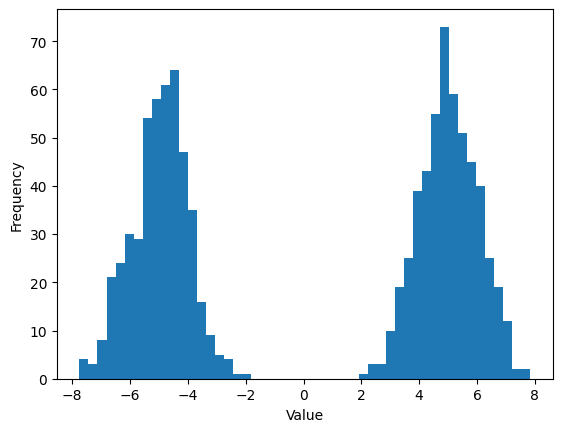

In [24]:
def bimodal(n):
    X = np.zeros((n))
    for i in range(n):
        if np.random.binomial(1,0.5)==0:
            X[i] = np.random.normal(-5,1)
        else:
            X[i] = np.random.normal(5,1)
    return X

X= bimodal(1000)

plt.hist(X,bins=50)
plt.ylabel('Frequency')
plt.xlabel('Value')
print('mean: ',np.mean(X))
print('standard deviation:', np.std(X))

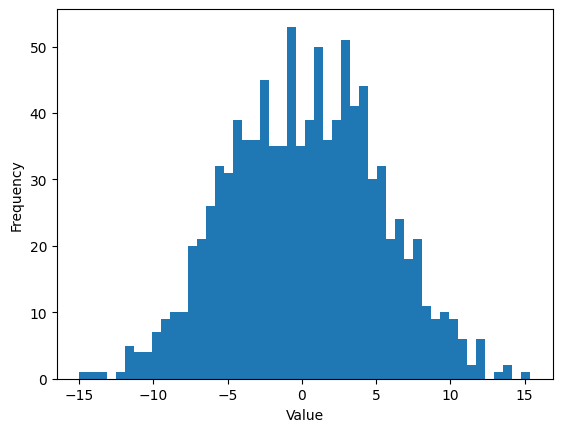

In [ ]:
mu = np.mean(X)
sigma = np.std(X)

N = np.random.normal(mu,sigma,1000)

plt.hist(N,bins=50)
plt.ylabel('Frequency')
plt.xlabel('Value');

In [ ]:
from statsmodels.stats.stattools import jarque_bera

jarque_bera(X) # the value is < 0.05 and we say that X is not normal.

(np.float64(142.12550136207705),
 np.float64(1.3735343038981241e-31),
 np.float64(-0.007644415681800414),
 np.float64(1.1531707484649847))

# 샤프 비율(Sharpe Ratio)의 불안정성 분석 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_4676\2953714270.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([data2.index[int(i)].date() for i in ticks[:-1]])


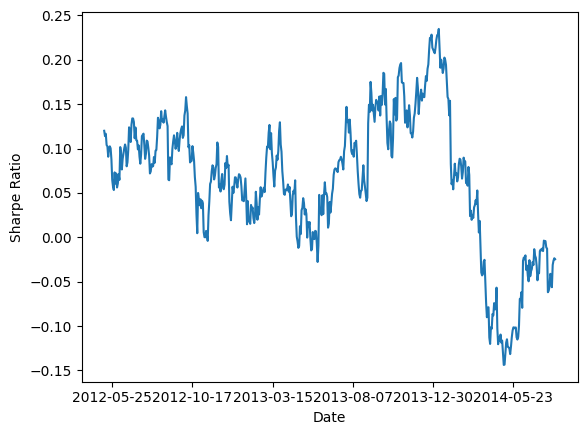

In [88]:
import yfinance as yf

def sharpe_ratio(asset,riskfree):
    return np.mean(asset - riskfree)/np.std(asset-riskfree)

start = '2012-01-01'
end = '2015-01-01'
data = yf.download('BIL',start=start,end=end,auto_adjust=True)['Close']['BIL']
treasury_ret = data.pct_change()[1:]
data2 = yf.download('AMZN',start=start,end=end,auto_adjust=True)['Close']['AMZN']
returns = data2.pct_change()[1:]
running_sharpe = [sharpe_ratio(returns[i-90:i],treasury_ret[i-90:i]) for i in range(90,len(returns))]

_,ax1 = plt.subplots()
ax1.plot(range(90,len(returns)-100),running_sharpe[:-100]);
ticks = ax1.get_xticks()

ax1.set_xticklabels([data2.index[int(i)].date() for i in ticks[:-1]])
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio');


C:\Users\USER\AppData\Local\Temp\ipykernel_4676\3758945897.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(data2.index[int(i)].date() for i in ticks[:-1])


Mean of running Sharpe Ratio: 0.06406514280877604
std of running Sharpe Ratio: 0.07774924516250435


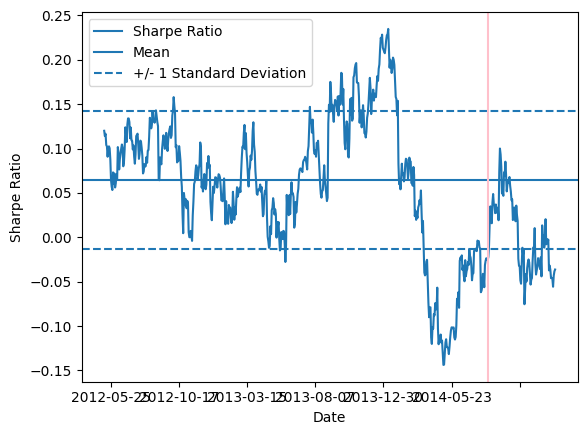

In [37]:
mean_rs = np.mean(running_sharpe[:-100])
std_rs = np.std(running_sharpe[:-100])

_,ax2 = plt.subplots()
ax2.set_xticklabels(data2.index[int(i)].date() for i in ticks[:-1])
ax2.plot(range(90,len(returns)),running_sharpe)

ax2.axhline(mean_rs)
ax2.axhline(mean_rs + std_rs , linestyle='--')
ax2.axhline(mean_rs - std_rs , linestyle='--')

ax2.axvline(len(returns)-100,color='pink');
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend(['Sharpe Ratio','Mean','+/- 1 Standard Deviation'])

print('Mean of running Sharpe Ratio:',mean_rs)
print('std of running Sharpe Ratio:',std_rs)

# 이동평균(Moving Average)의 불안정성

[*********************100%***********************]  1 of 1 completed


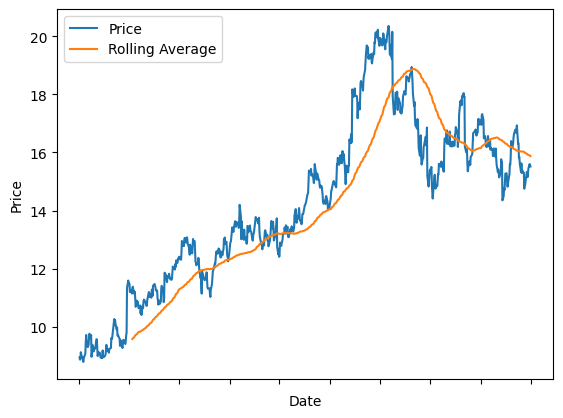

In [70]:
start = '2012-01-01'
end = '2015-01-01'
data = yf.download('AMZN',start=start,end=end,auto_adjust=True)['Close']
pricing = data['AMZN']

mu = pricing.rolling(window=90).mean()

# Plot pricing data
_, ax1 = plt.subplots()
ax1.plot(pricing.index, pricing, label='Price') 
ticks = ax1.get_xticks()
ax1.set_xticklabels([pricing.index[int(i)].date() for i in ticks[:-1] if 0<=i<len(pricing)]) # Label x-axis with dates
plt.ylabel('Price')
plt.xlabel('Date')

# Plot rolling mean
ax1.plot(mu);
plt.legend(['Price','Rolling Average']);

In [72]:
print('Mean of rolling mean:',np.mean(mu))
print('std of rolling mean:',np.std(mu))

Mean of rolling mean: 14.419316972447318
std of rolling mean: 2.5567575075803686


Mean of rolling std: 0.8701913782700503
std of rolling std: 0.3772346255500084


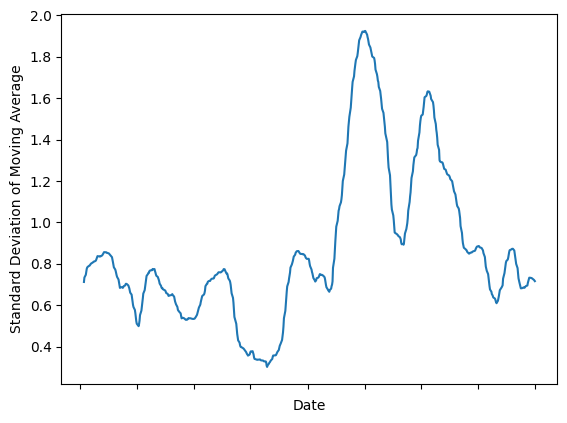

In [75]:
# Compute rolling standard deviation
std = pricing.rolling(window=90).std()

# Plot rolling std
_, ax2 = plt.subplots()
ax2.plot(std)
ax2.set_xticklabels([pricing.index[int(i)].date() for i in ticks[:-1] if 0<=i<len(pricing)]) # Label x-axis with dates
plt.ylabel('Standard Deviation of Moving Average')
plt.xlabel('Date')

print('Mean of rolling std:', np.mean(std))
print('std of rolling std:', np.std(std))

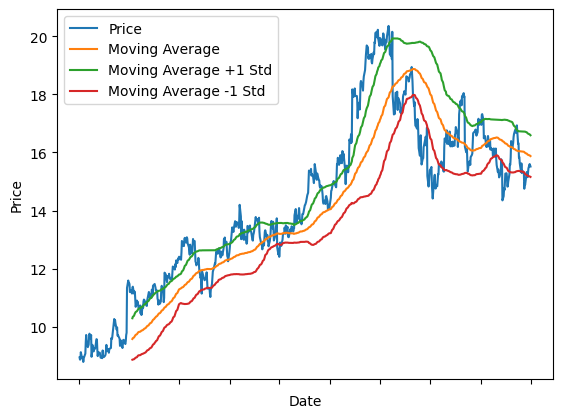

In [80]:
# Plot original data
_, ax3 = plt.subplots()
ax3.plot(pricing)
ax3.set_xticklabels([pricing.index[int(i)].date() for i in ticks[:-1] if 0<=i<len(pricing)]);

# Plot Bollinger bands
ax3.plot(mu)
ax3.plot(mu + std)
ax3.plot(mu-std)
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['Price','Moving Average','Moving Average +1 Std','Moving Average -1 Std']);